<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forests

**Random Forests**

Random Forests are an ensemble learning method that combines multiple decision trees to make a more accurate and stable prediction. Each tree in the forest is trained on a random subset of the data, and the final prediction is made by averaging (for regression) or voting (for classification) the predictions of individual trees. This helps to reduce overfitting and improve generalization

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


/tmp/ipython-input-4210254162.py:56: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, edgecolors='k', cmap=plt.cm.RdYlGn, label='Test Data')


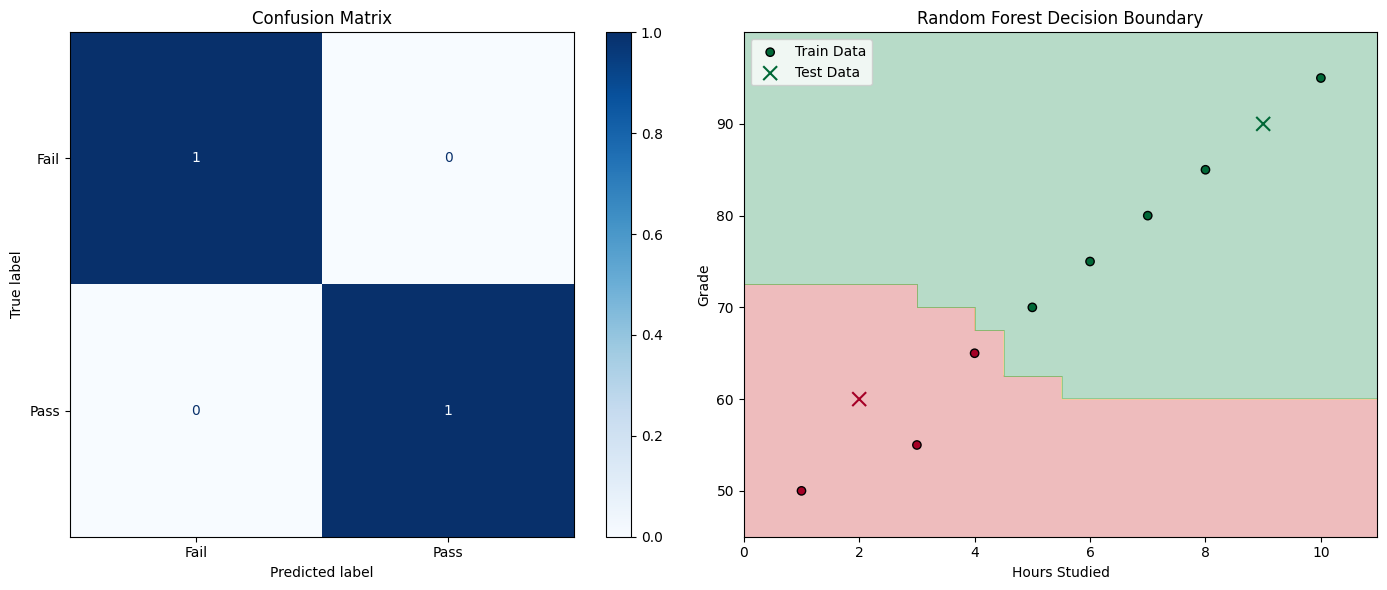

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Sample data (hours studied and grades vs. pass/fail)
# Reconstructing the data from the screenshot
X = np.array([
    [1, 50], [2, 60], [3, 55], [4, 65], [5, 70],
    [6, 75], [7, 80], [8, 85], [9, 90], [10, 95]
])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # 0 = fail, 1 = pass

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Confusion Matrix Heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Fail', 'Pass'])
disp.plot(cmap=plt.cm.Blues, ax=ax1)
ax1.set_title('Confusion Matrix')

# 2. Decision Boundary Plot
# Creating a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict across the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
ax2.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.3)
# Plot training points
ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.RdYlGn, label='Train Data')
# Plot testing points
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=100, edgecolors='k', cmap=plt.cm.RdYlGn, label='Test Data')

ax2.set_xlabel('Hours Studied')
ax2.set_ylabel('Grade')
ax2.set_title('Random Forest Decision Boundary')
ax2.legend()

plt.tight_layout()
plt.show()